In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
#1. Load the dataset into python environment
data=pd.read_csv('/content/titanic_dataset.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
#2. Make ‘PassengerId’ as the index column

df = pd.DataFrame(data)


In [25]:
df.set_index('PassengerId', inplace=True)

print(df.head())



             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [30]:
#3. Check the basic details of the dataset

data=df
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:

data1=data.drop(['Cabin','Embarked'],axis=1)
data1


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500


In [48]:
data1.isna()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,,,
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False


In [49]:
#4. Fill in all the missing values present in all the columns in the dataset

num_cols=['Survived','Pclass','Age','SibSp','Parch','Fare']
for i in num_cols:
  data1[i]=data1[i].fillna(data1[i].median())

data1.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7b87952c2710>,
 'caps': [<matplotlib.lines.Line2D at 0x7b87952c2bf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b87952c2470>],
 'medians': [<matplotlib.lines.Line2D at 0x7b87952c3130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b87952c33d0>],
 'means': []}

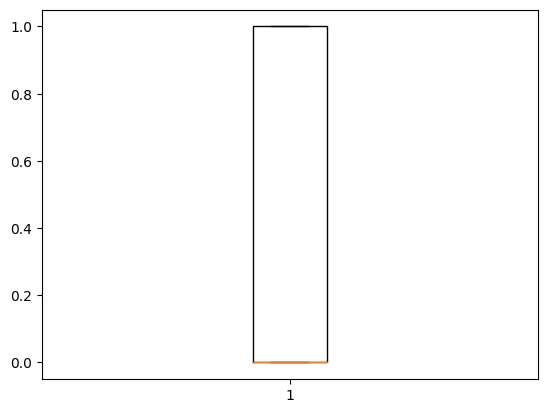

In [50]:
#5. Check and handle outliers in at least 3 columns in the dataset
plt.boxplot(data1['Survived'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b87953757b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b8795375bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b8795375510>],
 'medians': [<matplotlib.lines.Line2D at 0x7b8795376110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b87953763b0>],
 'means': []}

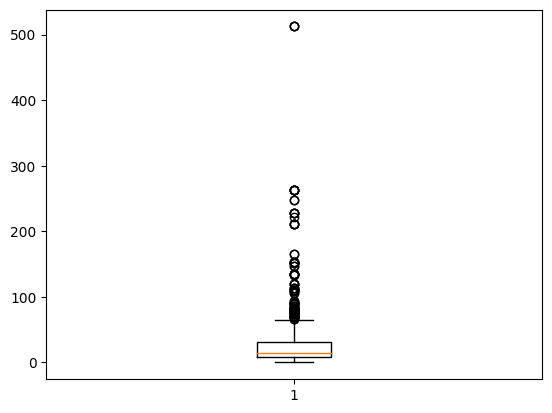

In [51]:
plt.boxplot(data1['Fare'])

In [63]:
Q1=np.percentile(data1['Fare'],25,method='midpoint')
Q2=np.percentile(data1['Fare'],50,method='midpoint')
Q3=np.percentile(data1['Fare'],75,method='midpoint')
print(" Q1 is ",Q1)
print(" Q2 is ",Q2)

print(" Q3 is ",Q3)


 Q1 is  7.9104
 Q2 is  14.4542
 Q3 is  31.0


In [64]:
IQR= Q3-Q1
IQR

23.0896

In [65]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print("Lower Limit ", low_lim)
print("Upper Limit", up_lim)


Lower Limit  -26.724
Upper Limit 65.6344


In [66]:
outlier=[]
for x in data1['Fare']:
  if(x>up_lim) or (x<low_lim):
    outlier.append(x)

outlier

[]

In [68]:
data1['Fare']=data1['Fare'].clip(lower=low_lim,upper=up_lim)

outlier=[]
for x in data1['Fare']:
  if(x>up_lim) or (x<low_lim):
    outlier.append(x)

outlier

[]

{'whiskers': [<matplotlib.lines.Line2D at 0x7b87951844c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b8795184a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b8795184220>],
 'medians': [<matplotlib.lines.Line2D at 0x7b8795184f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b87951851e0>],
 'means': []}

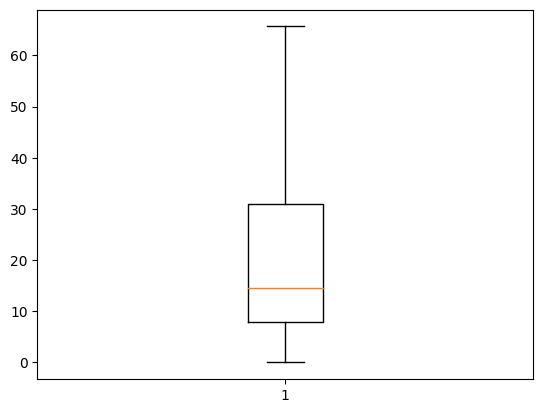

In [69]:
plt.boxplot(data1['Fare'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b8794fcfa30>,
 'caps': [<matplotlib.lines.Line2D at 0x7b8794fcfee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b8794fcf790>],
 'medians': [<matplotlib.lines.Line2D at 0x7b8795004460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b8795004700>],
 'means': []}

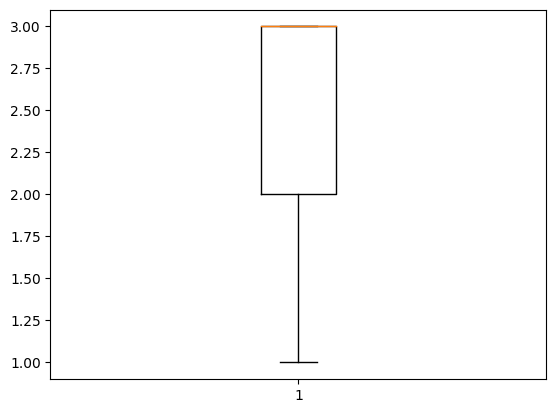

In [74]:
plt.boxplot(data1['Pclass'])

In [74]:
# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
min_max_scaler=MinMaxScaler()

In [88]:
X = data1.drop(['Survived','Name','Sex','Ticket'], axis=1)  # Drop 'Survived' column to get features
y = df['Survived']

In [89]:
X_scaled = min_max_scaler.fit_transform(X)


In [90]:
data_scaled_new=pd.DataFrame(X_scaled)

In [91]:
data_scaled_new.head(10)

,0,1,2,3,4
0,1.0,0.271174,0.125,0.000000,0.110460
1,0.0,0.472229,0.125,0.000000,1.000000
2,1.0,0.321438,0.000,0.000000,0.120745
3,0.0,0.434531,0.125,0.000000,0.809027
4,1.0,0.434531,0.000,0.000000,0.122649
5,1.0,0.346569,0.000,0.000000,0.128870
6,0.0,0.673285,0.000,0.000000,0.790173
7,1.0,0.019854,0.375,0.166667,0.321097
8,1.0,0.334004,0.000,0.333333,0.169626
9,0.5,0.170646,0.125,0.000000,0.458156
